# EDA

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with open('logins.json') as f:
  data = json.load(f)
logins = pd.Series(data['login_time'])
logins_time = pd.to_datetime(logins)
logins_time

0       1970-01-01 20:13:18
1       1970-01-01 20:16:10
2       1970-01-01 20:16:37
3       1970-01-01 20:16:36
4       1970-01-01 20:26:21
5       1970-01-01 20:21:41
6       1970-01-01 20:12:16
7       1970-01-01 20:35:47
8       1970-01-01 20:35:38
9       1970-01-01 20:47:52
10      1970-01-01 20:26:05
11      1970-01-01 20:31:03
12      1970-01-01 20:34:46
13      1970-01-01 20:36:34
14      1970-01-01 20:39:25
15      1970-01-01 20:40:37
16      1970-01-01 20:34:58
17      1970-01-01 20:43:59
18      1970-01-01 20:47:46
19      1970-01-01 20:46:34
20      1970-01-01 20:56:07
21      1970-01-01 20:49:12
22      1970-01-01 20:59:06
23      1970-01-01 20:59:59
24      1970-01-01 21:15:01
25      1970-01-01 21:09:24
26      1970-01-01 21:19:24
27      1970-01-01 21:20:53
28      1970-01-01 21:29:19
29      1970-01-01 21:58:05
                ...        
93112   1970-04-13 17:38:24
93113   1970-04-13 17:37:19
93114   1970-04-13 17:45:35
93115   1970-04-13 17:39:02
93116   1970-04-13 1

In [2]:
df = pd.DataFrame({'time':logins_time,'month':logins_time.dt.month,'day':logins_time.dt.day, 
                   'day_of_week':logins_time.dt.dayofweek,'hour':logins_time.dt.hour,'minute':logins_time.dt.minute})
df.head()

,time,month,day,day_of_week,hour,minute
0,1970-01-01 20:13:18,1,1,3,20,13
1,1970-01-01 20:16:10,1,1,3,20,16
2,1970-01-01 20:16:37,1,1,3,20,16
3,1970-01-01 20:16:36,1,1,3,20,16
4,1970-01-01 20:26:21,1,1,3,20,26


In [3]:
def agg_minutes(minute):
    if minute >= 45:
        return 45
    elif minute >= 30:
        return 30
    elif minute >= 15:
        return 15
    else:
        return 0

In [4]:
df['agg_minute'] = df.minute.apply(agg_minutes)
df.head()

,time,month,day,day_of_week,hour,minute,agg_minute
0,1970-01-01 20:13:18,1,1,3,20,13,0
1,1970-01-01 20:16:10,1,1,3,20,16,15
2,1970-01-01 20:16:37,1,1,3,20,16,15
3,1970-01-01 20:16:36,1,1,3,20,16,15
4,1970-01-01 20:26:21,1,1,3,20,26,15


make dictionary to correlate day of week to word equivalent

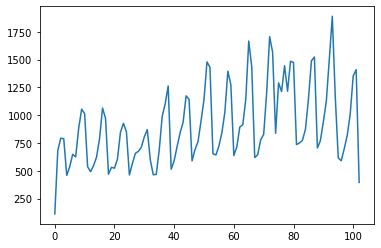

In [5]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
logins_day = df.groupby(['month', 'day'])['time'].count()

plt.plot(logins_day.values, label='Logins per day')

Above we see the count of logins over 100 days. Generally we see an increase in logins over time. However there is a clear indication tha there are days with a drop in logins compared to other days.

Next we can compare how each day of the week compares in logins

Text(0.5, 6.800000000000011, 'Week number')

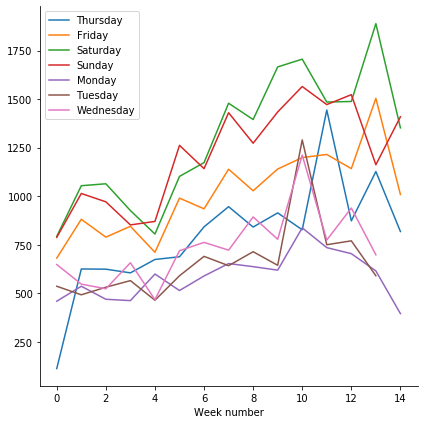

In [6]:
logins_dayofweek = df.groupby(['month', 'day', 'day_of_week'])['time'].count().reset_index()[['day_of_week', 'time']]
logins_dayofweek.day_of_week = logins_dayofweek.day_of_week.map(days)
g = sns.FacetGrid(logins_dayofweek, hue='day_of_week', height = 6)
g.map(plt.plot, 'time')
plt.legend()
plt.xlabel('Week number')

From this we see that there are generally more logins near the second half of the week (Thursday-Sunday).

# Experiment and metric design

1. The key measure of success of this experiment would be to calculate the amount of time a driver spends in each city. If the average driver is spending around 50% in each city then it should imply that the experiment is a success. Since without the toll, there was already reasonable activity in both cities, we can use that to compare with the new experiment. 

2. Since we are comparing before and after data it is important to first understand the current patterns and trends before the toll was implemented, when the toll was implemented, and then looking forward to the planned experiment. We can record up to a month of data in order to capture 4 sets of weekly data for each plan. The time period also depends on the amount of data we have.
    For statistical tests we can use a two-tailed to find out if there was any change in our experiment as opposed to the original driving patterns. We can then compute significance through p-value.
    At the end of the experiment, if we see a significant change where drivers are spending time in both cities compared to they are only being exclusive to one city due to the tolls, it is a clear indication that reimbursements are a good idea. If not, then the cities should not implement the tolls as it may be more costly than desired and can be save for other use. We can also consider looking at partial reimbursements or some kind of reward plan which will further encourage drivers to be more active in both cities but scale it at a reasonable pricing for the cities.




# Modelling

## Cleaning

In [7]:
with open('ultimate_data_challenge.json') as f:
  ultimate_data = json.load(f)
df = pd.DataFrame(ultimate_data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


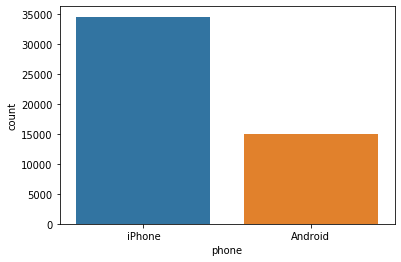

In [9]:
ax = sns.countplot(x='phone', data = df)

C:\Users\Samuel\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


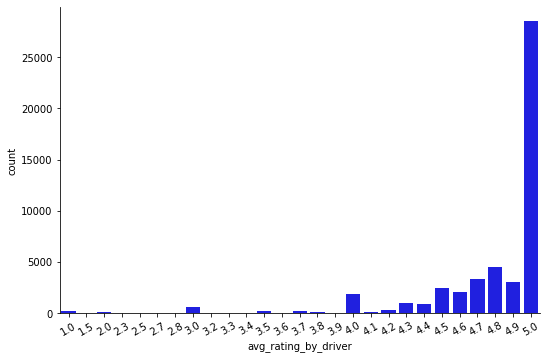

In [10]:
g = sns.factorplot("avg_rating_by_driver", data=df, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=30)


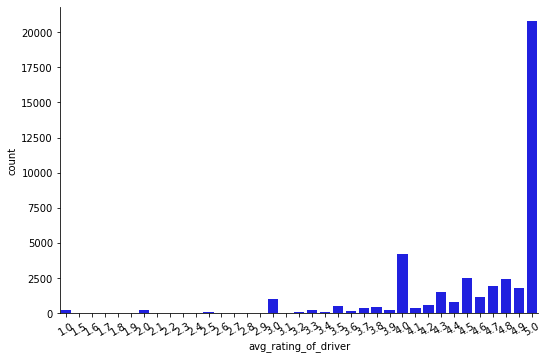

In [11]:
g = sns.factorplot("avg_rating_of_driver", data=df, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=30)

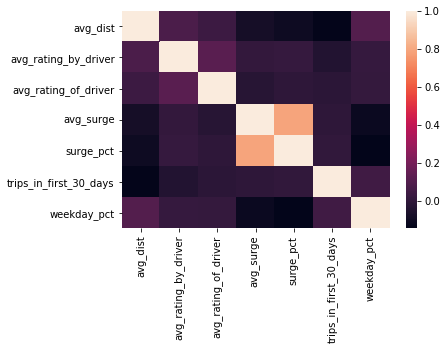

In [12]:
corr = df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct', \
           'trips_in_first_30_days','weekday_pct']].corr()

sns.heatmap(corr)

Not much correlation between numerical factors besides avg_surge and surge_pct

In [13]:
min(pd.to_datetime(df["last_trip_date"]))

Timestamp('2014-01-01 00:00:00')

In [14]:
max(pd.to_datetime(df["last_trip_date"]))

Timestamp('2014-07-01 00:00:00')

In [15]:
active = (pd.to_datetime(df["last_trip_date"]) < pd.to_datetime(max(df["last_trip_date"])) - pd.Timedelta("30 days"))
active.value_counts()

True     31196
False    18804
Name: last_trip_date, dtype: int64

In [16]:
print(str(31196 / (31196+18804)) + ' of observed riders retained')

0.62392 of observed riders retained


### Create a model that predict active users in their 6th month

In [17]:
min(pd.to_datetime(df['signup_date']))

Timestamp('2014-01-01 00:00:00')

In [18]:
max(pd.to_datetime(df['signup_date']))

Timestamp('2014-01-31 00:00:00')

In [19]:
from datetime import timedelta
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
sixth_month_active = lambda row: 2 if \
                      row['last_trip_date'] - row['signup_date'] \
                      > timedelta(days=30*5) \
                      else 1

df['sixth_month_active'] = df.apply(sixth_month_active, axis=1)

df[['signup_date', 'last_trip_date', 'sixth_month_active']].head()

,signup_date,last_trip_date,sixth_month_active
0,2014-01-25,2014-06-17,1
1,2014-01-29,2014-05-05,1
2,2014-01-06,2014-01-07,1
3,2014-01-10,2014-06-29,2
4,2014-01-27,2014-03-15,1


Since both signup_date and last_trip_date were used to determine our new column we can remove them from our data since they won't be features we should worry as much about.

In [20]:
df = df.drop(columns = ["last_trip_date", "signup_date"])
print(df.isna().any())

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
phone                      True
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
sixth_month_active        False
dtype: bool


In [21]:
#get rid of NaN with means for driver ratings
mean = df["avg_rating_by_driver"].mean()
rating = lambda row: mean if np.isnan(row) else row
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].apply(rating)

mean = df["avg_rating_of_driver"].mean()
rating = lambda row: mean if np.isnan(row) else row
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].apply(rating)

#phones won't have mean so just classify as Unknown
unknown = lambda row: "Unknown" if type(row) != str else row
df["phone"] = df["phone"].apply(unknown)

Can use dummy variables for categorical variables (city, phone, ultimate_black_user)

In [22]:
from sklearn.model_selection import train_test_split

dummied_data = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)
y = df['sixth_month_active']
X = dummied_data.drop(columns = ['sixth_month_active'])
feature_list = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 12) (40000,)
(10000, 12) (10000,)


In [23]:
X_train.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone,ultimate_black_user_True
20330,4.22,4.8,4.400000,1.00,0.0,8,58.8,0,1,0,1,0
17532,3.10,4.8,5.000000,1.00,0.0,3,60.0,1,0,0,1,0
45819,3.80,4.8,3.000000,1.16,18.8,2,62.5,0,0,0,1,0
34807,19.99,5.0,5.000000,1.00,0.0,2,100.0,0,0,0,1,0
31888,15.29,2.0,4.601559,1.00,0.0,1,100.0,0,1,0,0,1


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [25]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')
print(predictions)

Mean absolute error:  0.28 degrees.
[1.         1.1        1.         ... 1.06666667 1.         1.        ]


In [28]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  79.15 %.


In [27]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: avg_dist             Importance: 0.30926
Variable: weekday_pct          Importance: 0.13456
Variable: avg_rating_by_driver Importance: 0.1326
Variable: surge_pct            Importance: 0.104
Variable: avg_rating_of_driver Importance: 0.09176
Variable: trips_in_first_30_days Importance: 0.07576
Variable: avg_surge            Importance: 0.04806
Variable: city_King's Landing  Importance: 0.03676
Variable: ultimate_black_user_True Importance: 0.02456
Variable: phone_iPhone         Importance: 0.02376
Variable: city_Winterfell      Importance: 0.01683
Variable: phone_Unknown        Importance: 0.00208


Model is 79.15% accurate, biggest factor in determining rider retention is distance. I propose that Ultimate can offer a rewards program which will scale by distance. This should encourage riders to stay with the program.